# Other approaches to clustering

In [1]:
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

# Create dataset

In [2]:
def create_dataset(num_blobs, blob_spread):
    # Create blob centers at random
    x_indices = np.random.randint(-1, 1, num_blobs) * np.random.randint(1, blob_spread, num_blobs)
    y_indices = np.random.randint(-1, 1, num_blobs) * np.random.randint(1, blob_spread, num_blobs)
    centers = list(zip(x_indices, y_indices))
    centers = [list(x) for x in centers]
    
    # Make 10,000 rows worth of data with two features representing num_blobs
    # clusters, each having a standard deviation of 1.
    X, y = make_blobs(
        n_samples=10000,
        centers=centers,
        cluster_std=1,
        n_features=2,
        random_state=42)
    
    return X, y

In [3]:
X, y = create_dataset(3, 6)

## Display Blobs

In [4]:
def display_blobs(X, y, model_type):
    num_blobs = len(np.unique(y))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(f'{model_type}: Displaying {num_blobs} Blobs')
    plt.show()

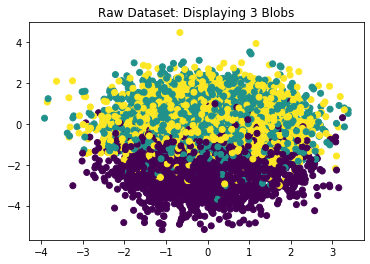

In [5]:
display_blobs(X, y, 'Raw Dataset')

## Create train and test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

## Mean Shift

In [7]:
def fit_mean_shift(X_train, y_train):
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    display_blobs(X_train, y_train, 'Mean Shift')
    print(f'There are {n_clusters_} estimated clusters.')
    print('Comparing predictions with actual assignments')
    df_crosstab = pd.crosstab(y_train, labels)
    df_crosstab.columns.name = 'actual'
    df_crosstab.index.name = 'predicted'
    print(df_crosstab)

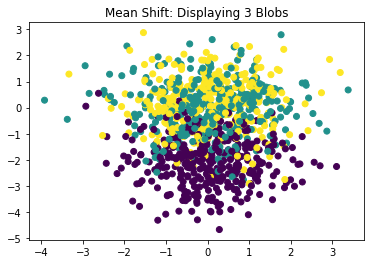

There are 1 estimated clusters.
Comparing predictions with actual assignments
actual       0
predicted     
0          362
1          320
2          318


In [8]:
fit_mean_shift(X_train, y_train)

## Spectral clustering

In [9]:
def fit_spectral_clustering(X_train, y_train, num_blobs):
    sc = SpectralClustering(n_clusters=num_blobs)
    sc.fit(X_train)
    predict=sc.fit_predict(X_train)
    display_blobs(X_train, y_train, 'Spectral Clustering')
    print('Comparing predictions with actual assignments')
    df_crosstab = pd.crosstab(y_train, predict)
    df_crosstab.columns.name = 'actual'
    df_crosstab.index.name = 'predicted'
    print(df_crosstab)

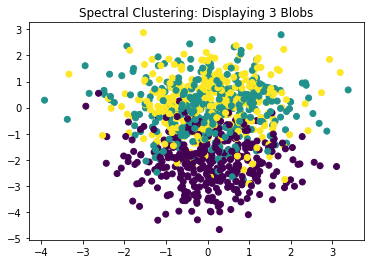

Comparing predictions with actual assignments
actual       0    1    2
predicted               
0           24   90  248
1          139  158   23
2          152  147   19


In [10]:
fit_spectral_clustering(X_train, y_train, 3)

In [11]:
def plot_affinity_blobs(X_train, cluster_centers_indices, num_clusters, labels, model_type):
    plt.figure(1)
    plt.clf()

    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(num_clusters), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title(f'{model_type}: Displaying {num_clusters} Blobs')
    plt.show()

In [12]:
def fit_affinity_model(X_train):
    af = AffinityPropagation().fit(X_train)
    print('Done')

    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print(f'There are {n_clusters_} estimated clusters.')
    
    plot_affinity_blobs(X_train, cluster_centers_indices, n_clusters_, labels, 'Affinity')

Done
There are 37 estimated clusters.


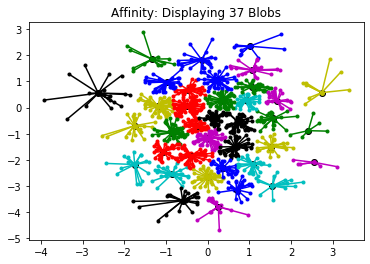

In [13]:
fit_affinity_model(X_train)

## Compare Models
Run each type of model six times, using three different values for the blob count and three different values for the blob separations.

Blob count: 3
Blob spread: 2


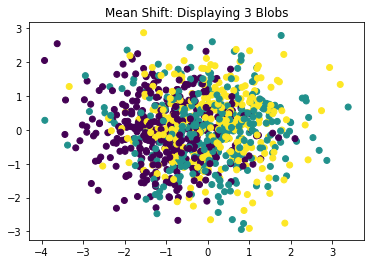

There are 1 estimated clusters.
Comparing predictions with actual assignments
actual       0
predicted     
0          362
1          320
2          318


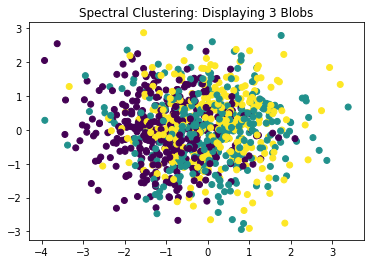

Comparing predictions with actual assignments
actual       0    1    2
predicted               
0          128   53  181
1          115  141   64
2           91  152   75
Done
There are 39 estimated clusters.


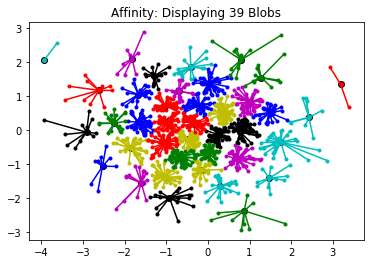

---------------------------------------------
Blob count: 3
Blob spread: 7


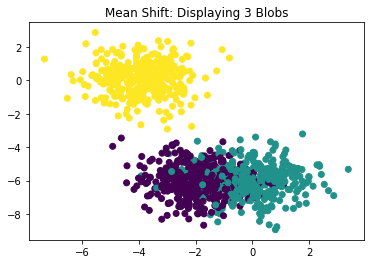

There are 2 estimated clusters.
Comparing predictions with actual assignments
actual       0    1
predicted          
0          360    2
1          320    0
2            0  318


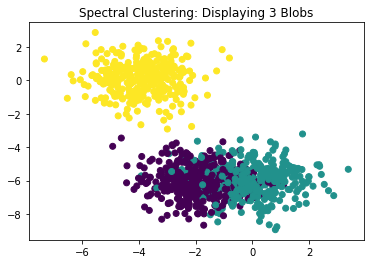

Comparing predictions with actual assignments
actual       0    1    2
predicted               
0          321    0   41
1           61    0  259
2            2  316    0
Done
There are 99 estimated clusters.


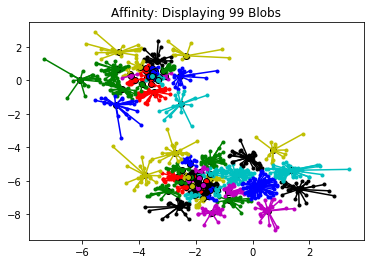

---------------------------------------------
Blob count: 3
Blob spread: 15


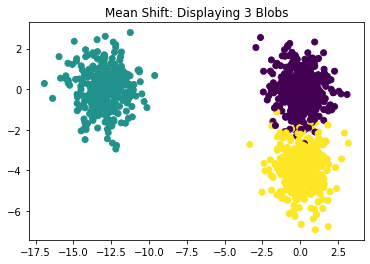

There are 3 estimated clusters.
Comparing predictions with actual assignments
actual       0    1    2
predicted               
0          351   11    0
1            0    0  320
2            6  312    0


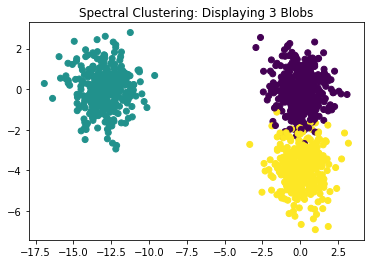

Comparing predictions with actual assignments
actual       0    1    2
predicted               
0          357    0    5
1            0  320    0
2            8    0  310
Done
There are 300 estimated clusters.


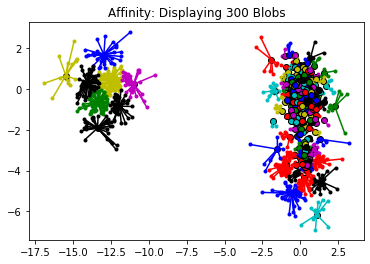

---------------------------------------------
Blob count: 5
Blob spread: 2


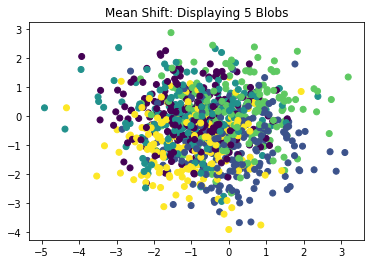

There are 1 estimated clusters.
Comparing predictions with actual assignments
actual       0
predicted     
0          221
1          203
2          191
3          187
4          198


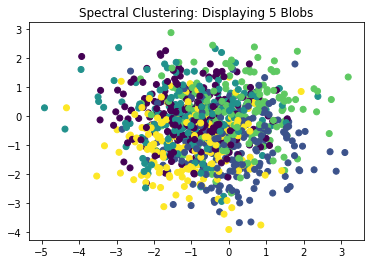

Comparing predictions with actual assignments
actual       0  1   2   3   4
predicted                    
0          169  2   1  39  10
1          122  2  38  13  28
2          139  7   3  33   9
3          120  0   6   5  56
4          125  1  12  57   3
Done
There are 37 estimated clusters.


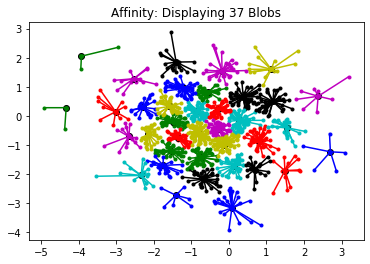

---------------------------------------------
Blob count: 5
Blob spread: 7


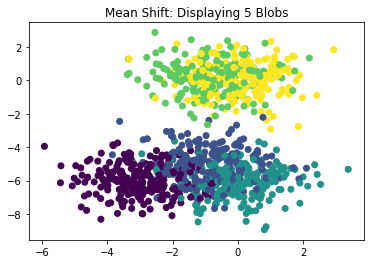

There are 2 estimated clusters.
Comparing predictions with actual assignments
actual       0    1
predicted          
0          221    0
1          200    3
2          191    0
3            0  187
4            0  198


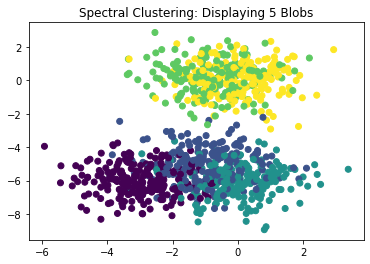

Comparing predictions with actual assignments
actual       0    1    2    3    4
predicted                         
0            0  185    0   11   25
1            1   18    0   60  124
2            0   10    0  151   30
3           71    0  115    0    1
4          133    0   62    0    3
Done
There are 26 estimated clusters.


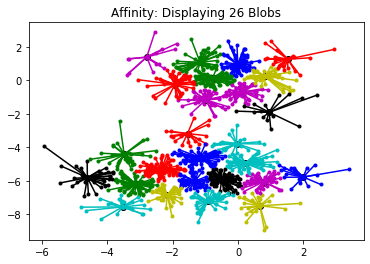

---------------------------------------------
Blob count: 5
Blob spread: 15


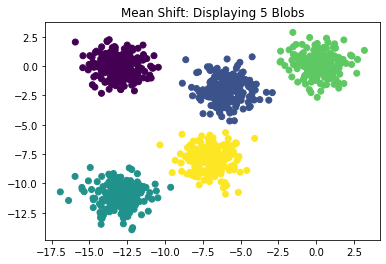

There are 5 estimated clusters.
Comparing predictions with actual assignments
actual       0    1    2    3    4
predicted                         
0          221    0    0    0    0
1            0    0  203    0    0
2            0    0    0  191    0
3            0    0    0    0  187
4            0  198    0    0    0


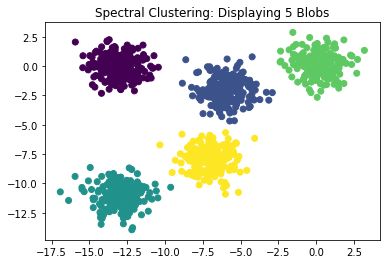

Comparing predictions with actual assignments
actual       0    1    2    3    4
predicted                         
0            0  221    0    0    0
1          203    0    0    0    0
2            0    0    0  191    0
3            0    0  187    0    0
4            0    0    0    0  198
Done
There are 14 estimated clusters.


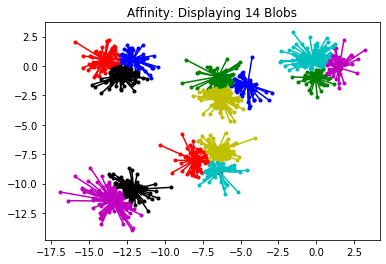

---------------------------------------------
Blob count: 7
Blob spread: 2


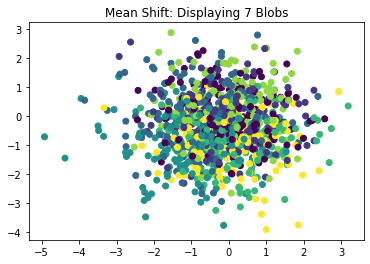

There are 2 estimated clusters.
Comparing predictions with actual assignments
actual       0   1
predicted         
0          149   0
1          154   1
2          140   7
3          119  16
4          141   0
5          149   1
6          122   1


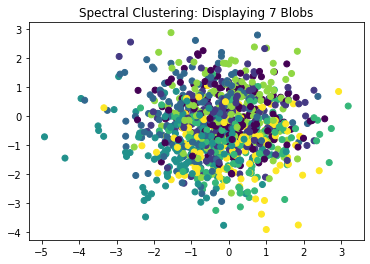

Comparing predictions with actual assignments
actual      0  1  2    3  4   5  6
predicted                         
0          15  0  0  122  0  12  0
1          18  0  0  127  2   8  0
2          16  1  0  108  5  16  1
3          27  1  2   88  1  12  4
4          15  0  0  101  0  25  0
5          17  0  0  116  2  15  0
6          10  0  0   90  2  20  1
Done
There are 39 estimated clusters.


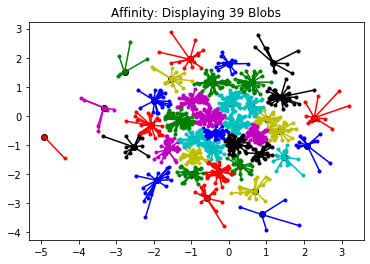

---------------------------------------------
Blob count: 7
Blob spread: 7


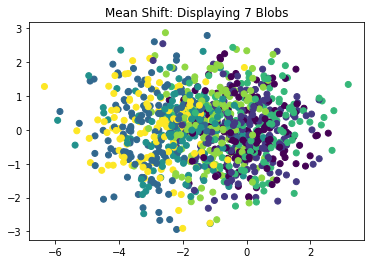

There are 1 estimated clusters.
Comparing predictions with actual assignments
actual       0
predicted     
0          149
1          155
2          147
3          135
4          141
5          150
6          123


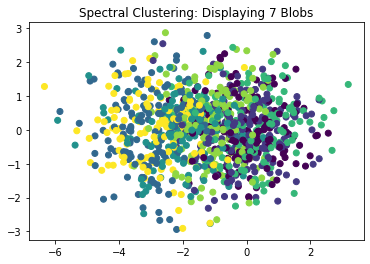

Comparing predictions with actual assignments
actual      0    1   2   3  4   5   6
predicted                            
0          62   67  19   0  0   1   0
1          54   78  18   2  0   3   0
2           7   72   0  17  2  16  33
3          14   95   0   6  2  12   6
4          47   62  32   0  0   0   0
5          36  103   0   2  0   8   1
6           2   70   0  12  2   8  29
Done
There are 35 estimated clusters.


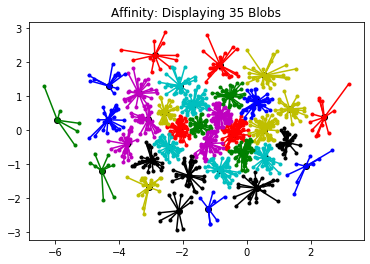

---------------------------------------------
Blob count: 7
Blob spread: 15


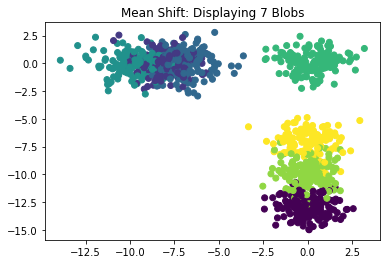

There are 3 estimated clusters.
Comparing predictions with actual assignments
actual       0    1    2
predicted               
0            0  149    0
1          155    0    0
2          145    0    2
3          135    0    0
4            0    0  141
5            0  150    0
6            0  111   12


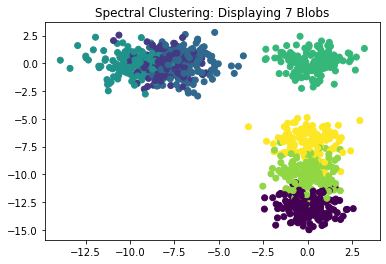

Comparing predictions with actual assignments
actual      0    1    2    3   4    5    6
predicted                                 
0           0    0    0  139   0   10    0
1           0   30    0    0   0    0  125
2           1    2    0    0   0    0  144
3           0  118    0    0   0    0   17
4          82    0    0    0  59    0    0
5           0    0    9    6   0  135    0
6           0    0  113    0   0   10    0
Done
There are 14 estimated clusters.


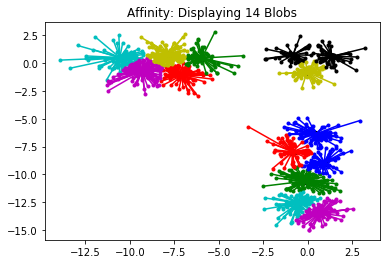

---------------------------------------------


In [14]:
num_blobs_list = [3, 5, 7]
blob_spread_list = [2, 7, 15]
for num_blobs in num_blobs_list:
    for blob_spread in blob_spread_list:
        X, y = create_dataset(num_blobs, blob_spread)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
        print(f'Blob count: {num_blobs}')
        print(f'Blob spread: {blob_spread}')
        fit_mean_shift(X_train, y_train)
        fit_spectral_clustering(X_train, y_train, num_blobs)
        fit_affinity_model(X_train)
        print('---------------------------------------------')

## Observations
When the blob separations are small, each cluster overlaps, making it harder for the model to find the right number of blobs. Larger cluster separations are better when there are more clusters. The affinity model always seems to way over estimate the number of blobs.